In [1]:
# https://www.youtube.com/watch?v=x-5VNCX8s14
    
# DUMMY VARIABLES: https://www.statlect.com/fundamentals-of-statistics/dummy-variable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from scipy.special import gamma, loggamma, factorial
import scipy.stats
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator 
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
from mycolorpy import colorlist as mcp
from matplotlib import legend_handler
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import collections
import matplotlib
import shapely.geometry
from shapely.geometry import Point
import shapely.ops 
from geopy.geocoders import Nominatim
import geopandas as gpd
import mapclassify
import jenkspy
import contextily as cx
import os
import rioxarray as rx
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn import metrics
# import plots
import seaborn as sns
from datetime import datetime

In [88]:
wd = '/Users/carmen/Library/CloudStorage/OneDrive-TheUniversityofLiverpool/Research/RECAST/latin-mobility-covid-local-files'


country = 'Chile'

if country=='Argentina':
    country_short = 'ARG'
    country_code = 'AR'
elif country == 'Chile':
    country_short = 'CHL'
    country_code = 'CL'
elif country == 'Colombia':
    country_short = 'COL'
    country_code = 'CO'
elif country == 'Mexico':
    country_short = 'MEX'
    country_code = 'MX'

In [89]:
movcell_baseline_imput_pop = gpd.read_file(wd + '/data/outputs/' + country_short + '/grids-with-data/movcell-baseline-imput-pop-with-exo-var/movcell-baseline-imput-pop-with-exo-var.gpkg')
movcell_baseline_imput_pop['FID'] = movcell_baseline_imput_pop.index

baseline_mov = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/baseline_mov.csv')
baseline_mov = baseline_mov.fillna(-1)
baseline_mov = baseline_mov.replace(-999, -1)

# grid_pop = pd.merge(grid_pop, baseline_pop, on='FID', how='left')

In [90]:
index_to_drop = []
for i in range(len(baseline_mov)):
    if baseline_mov.loc[i, 'O'] == baseline_mov.loc[i, 'D']:
        index_to_drop.append(i)
#     if -1 in baseline_mov.loc[i, :].values:
#         index_to_drop.append(i)
baseline_mov_dist = baseline_mov.drop(index_to_drop, axis=0).reset_index(drop=True)


In [91]:
baseline_mov_imput_sim = baseline_mov_dist.copy()


In [92]:
n_class = 0
n_labels_density = 5
n_class_labels_density = {}
for i in range(n_labels_density):
    for j in range(n_labels_density):
        n_class += 1
        n_class_labels_density[n_class-1] = [i, j]
        
n_class = 0
n_labels_rdi = 5
n_class_labels_rdi = {}
for i in range(n_labels_rdi):
    for j in range(n_labels_rdi):
        n_class += 1
        n_class_labels_rdi[n_class-1] = [i+1, j+1]
        

In [93]:
# # Only uncomment if I want to generate table of explanatory variables for SIM

# y = []
# O = []
# D = []
# pop_O = []
# pop_D = []
# wday = []
# OD_class_density = []
# OD_class_rdi = []
# dist = []
# index_m1_flat = []
# index_m1_pair = []

# n_class = 0
# n_labels_density = 5
# n_class_labels_density = {}
# for i in range(n_labels_density):
#     for j in range(n_labels_density):
#         n_class += 1
#         n_class_labels_density[n_class-1] = [i, j]
        
# n_class = 0
# n_labels_rdi = 5
# n_class_labels_rdi = {}
# for i in range(n_labels_rdi):
#     for j in range(n_labels_rdi):
#         n_class += 1
#         n_class_labels_rdi[n_class-1] = [i+1, j+1]

# count = 0
# for i in range(len(baseline_mov_imput_sim)):
#     for j in range(7):
#         y.append(baseline_mov_imput_sim.loc[i, str(j)])
#         wday.append(str(j))
        
#         if baseline_mov_imput_sim.loc[i, str(j)] == -1:
#             index_m1_flat.append(count)
#             index_m1_pair.append([i, str(j)])
#         try:
#             pop_origin = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, str(j)]
#         except:
#             print(i, 'O')
#             pop_origin = np.nan
#         pop_O.append(pop_origin)
#         O.append(baseline_mov_imput_sim.loc[i, 'O'])
        
#         try:
#             pop_destination = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, str(j)]
#         except:
#             print(i, 'D')
#             pop_destination = np.nan
#         pop_D.append(pop_destination)
#         D.append(baseline_mov_imput_sim.loc[i, 'D'])
        
#         try:
#             O_class_density = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'class_density']
#             D_class_density = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'class_density']
#         except:
#             O_class_density = np.nan
#             D_class_density = np.nan
            
#         try:
#             O_class_rdi = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'class_rdi']
#             D_class_rdi = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'class_rdi']
#         except:
#             O_class_rdi = np.nan
#             D_class_rdi = np.nan
            
#         try:
#             OD_class_density.append([key for key, value in n_class_labels_density.items() if value == [O_class_density, D_class_density]][0])
#         except:
#             OD_class_density.append(np.nan)
            
#         try:
#             OD_class_rdi.append([key for key, value in n_class_labels_rdi.items() if value == [O_class_rdi, D_class_rdi]][0])
#         except:
#             OD_class_rdi.append(np.nan)
            
#         movcell_baseline_imput_pop = movcell_baseline_imput_pop.to_crs('epsg:3857')
        
#         try:
#             O_centroid = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'geometry'].centroid
#             D_centroid = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'geometry'].centroid
#             dist.append(O_centroid.distance(D_centroid))
#         except:
#             dist.append(np.nan)
            
#         count += 1
        
#     if i % 1000 == 0:
#         print(i/len(baseline_mov_imput_sim)*100)
        
# obs = [True for i in range(len(OD_class_density))]
# for index in index_m1_flat:
#     obs[index] = False
    
# data = pd.DataFrame({'y': y, 'O': O, 'D': D, 'OD_class_density': OD_class_density, 'OD_class_rdi': OD_class_rdi, 'dist': dist, 'pop_O': pop_O, 'pop_D': pop_D, 'wday': wday, 'obs': obs})

# data.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-mov-dist-with-exo-var.csv')


In [94]:
n_class = 0
n_labels_density = 5
n_class_labels_density = {}
for i in range(n_labels_density):
    for j in range(n_labels_density):
        n_class += 1
        n_class_labels_density[n_class-1] = [i, j]
        
n_class = 0
n_labels_rdi = 5
n_class_labels_rdi = {}
for i in range(n_labels_rdi):
    for j in range(n_labels_rdi):
        n_class += 1
        n_class_labels_rdi[n_class-1] = [i, j]
        
# print(n_class_labels)


In [95]:
data = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-mov-dist-with-exo-var.csv').drop(['Unnamed: 0'],axis=1)


In [96]:
min(data['dist'])

11526.36599191246

In [97]:
print(len(data))
data_test = data[data['obs']==True]
print(len(data_test))
data_test = data_test[data_test['dist']>0]
print(len(data_test))
data_test = data_test[data_test['pop_O']>0]
print(len(data_test))
data_test = data_test[data_test['pop_D']>0]
print(len(data_test))
data_test = data_test[data_test['y']>0].reset_index(drop=True)
print(len(data_test))

203441
14012
14012
14012
14012
14012


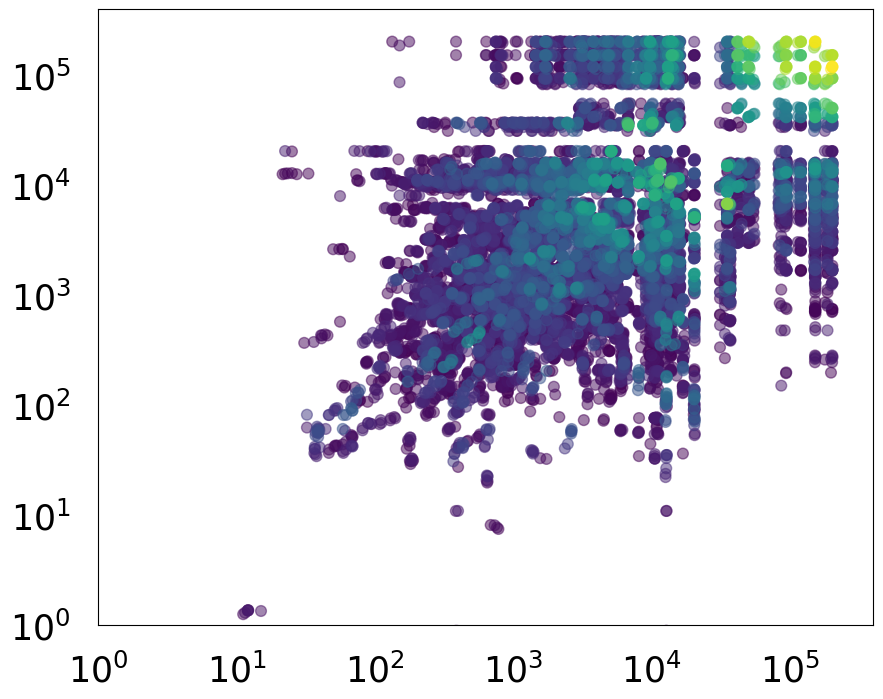

In [98]:
fig, ax = plt.subplots(figsize=(10,8))

data_test = data_test.sort_values(by='y', ascending=True)

ax.tick_params(axis = 'both', which = 'both', width = 0, length = 0, color = 'k', labelsize = 25, pad=20)
        
sc = ax.scatter(data_test['pop_O'], data_test['pop_D'], c=np.log10(data_test['y']), cmap='viridis', alpha=0.5, s=60)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([1,400000])
ax.set_ylim([1,400000])

plt.savefig(wd + '/plots/mov-data-obs-popOD/mov-data-obs-popOD-' + country_short + '.png', bbox_inches = 'tight')

plt.show()

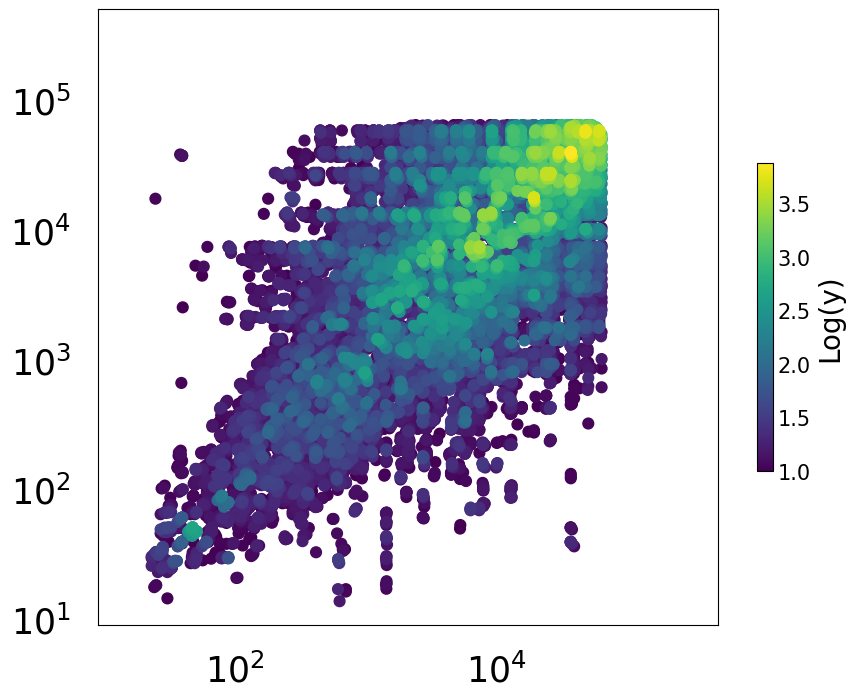

In [74]:
fig, ax = plt.subplots(figsize=(10,8))

data_test = data_test.sort_values(by='y', ascending=True)

ax.tick_params(axis = 'both', which = 'both', width = 0, length = 0, color = 'k', labelsize = 25, pad=20)
        
sc = ax.scatter(data_test['pop_O'], data_test['pop_D'], c=np.log10(data_test['y']), cmap='viridis', alpha=1, s=60)
ax.set_xscale('log')
ax.set_yscale('log')

# # Add a color bar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)  # Shrink the color bar size
cbar.set_label('Log(y)', fontsize=20)  # Label for the color bar
cbar.ax.tick_params(labelsize=15, length=0)  # Customize color bar ticks: no length

ax.set_xlim([9,500000])
ax.set_ylim([9,500000])

# plt.savefig(wd + '/plots/mov-data-obs-popOD/mov-data-obs-popOD-' + country_short + '-legend.png', bbox_inches = 'tight')

plt.show()

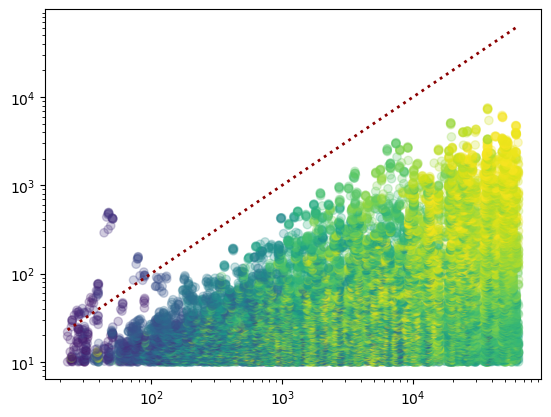

In [275]:
fig, ax = plt.subplots()
ax.scatter(data_test['pop_O'], data_test['y'], c=np.log(data_test['pop_D']), cmap='viridis', alpha=0.25)
x = np.linspace(min(data_test['pop_O']), max(data_test['pop_O']))
ax.plot(x, x, lw=2, color='darkred', linestyle=':')
ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig(wd + '/plots/mov-data-obs-popO-flow/mov-data-obs-popO-flow-' + country_short + '.pdf', bbox_inches = 'tight')

plt.show()

In [276]:
# data = data_test
dummies_wday = pd.get_dummies(data['wday'], drop_first=True, dtype=int)#.values
dummies_OD_class_density = pd.get_dummies(data['OD_class_density'], drop_first=True, dtype=int)
dummies_OD_class_rdi = pd.get_dummies(data['OD_class_rdi'], drop_first=True, dtype=int)
dummies_OD_class_density = dummies_OD_class_density.rename(columns={col: str(int(col)) + '_class_density' for col in dummies_OD_class_density.columns})#.values
dummies_OD_class_rdi = dummies_OD_class_rdi.rename(columns={col: str(int(col)) + '_class_rdi' for col in dummies_OD_class_rdi.columns})#.values
# dummies_O = pd.get_dummies(data['O'], drop_first=False, dtype=int)
X = data[['dist', 'pop_O', 'pop_D', 'obs', 'y']]
X = pd.concat([dummies_wday, X], axis=1)
# X = pd.concat([dummies_wday, X,  dummies_O, dummies_OD_class_density, dummies_OD_class_rdi], axis=1)
# X = pd.concat([dummies_wday, X, dummies_O], axis=1)
# X = pd.concat([X], axis=1)
X = sm.add_constant(X)

X = X[X['dist']>0].reset_index(drop=True)
X = X[X['pop_O']>0].reset_index(drop=True)
X = X[X['pop_D']>0].reset_index(drop=True)

X_obs = X[X['obs']==True].reset_index(drop=True)
y_obs = X_obs['y']
print(min(y_obs), max(y_obs))
X_obs = X_obs.drop(['obs', 'y'], axis=1)

X_predict = X
X_predict = X_predict.drop(['obs', 'y'], axis=1)


10.0 7536.0


In [277]:
print(len(X_obs))
X_obs_dropna = X_obs.dropna()
print(len(X_obs_dropna))
# X_obs_dropna = X_obs_dropna[X_obs_dropna['pop_O']>1]
# X_obs_dropna = X_obs_dropna[X_obs_dropna['pop_D']>1]
y_obs_dropna = y_obs.iloc[X_obs_dropna.index].reset_index(drop=True)
X_obs_dropna = X_obs_dropna.reset_index(drop=True)

X_obs_dropna['pop_O'] = np.log(X_obs_dropna['pop_O'])
X_obs_dropna['pop_D'] = np.log(X_obs_dropna['pop_D'])
X_obs_dropna['dist'] = np.log(X_obs_dropna['dist'])


28309
28309


In [278]:
prob = y_obs_dropna
prob_normalized = prob / prob.sum()

sample_y_obs_dropna = pd.DataFrame({'y_obs_dropna': y_obs_dropna})
sample_y_obs_dropna = sample_y_obs_dropna.sample(n=3000, weights=prob_normalized, replace=False)


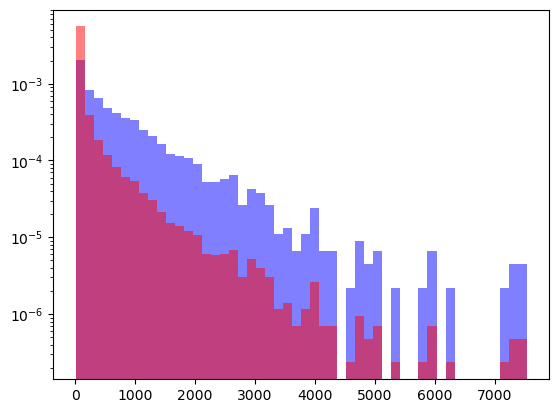

In [279]:
fig, ax = plt.subplots()
ax.hist(sample_y_obs_dropna['y_obs_dropna'], bins=50, color='blue', alpha=0.5, density=True)
ax.hist(y_obs_dropna, bins=50, color='red', alpha=0.5, density=True)
ax.set_yscale('log')
plt.show()

In [280]:
X_obs_dropna = X_obs_dropna.iloc[sample_y_obs_dropna.index]
y_obs_dropna = y_obs_dropna.iloc[sample_y_obs_dropna.index]

In [281]:
## THINK ABOUT MODEL!!


# def sse_log_a(a, Y, X):
#     log_aY = np.log(a * Y)
#     model = sm.GLM(log_aY, X, family=sm.families.NegativeBinomial(alpha=1))
#     res = model.fit()
#     opt = res.residual
#     print(opt)
#     return opt

# result = scipy.optimize.minimize(sse_log_a, x0=[12], args=(y_obs_dropna, X_obs_dropna), method='BFGS')
# a_estimated = result.x[0]
# print(f"Estimated value of a: {a_estimated}")

# log_aY = np.log(a_estimated * y_obs_dropna)
# model = sm.GLM(log_aY, X_obs_dropna, family=sm.families.NegativeBinomial(alpha=1))
# res = model.fit()
# print(res.summary())

model = sm.GLM(np.log(y_obs_dropna), X_obs_dropna, family=sm.families.Gaussian())
res = model.fit()
print(res.summary())

# model = sm.RLM(np.log(y_obs_dropna), X_obs_dropna, M=sm.robust.norms.HuberT())
# res = model.fit()
# print(res.summary())

# model = sm.GLM(np.log(y_obs_dropna), X_obs_dropna, family=sm.families.Gaussian(sm.families.links.identity()))
# res = model.fit(cov_type='HC3')
# print(res.summary())

# data_quantreg = X_obs_dropna.copy()
# data_quantreg['Y'] = np.log(y_obs_dropna)
# data_quantreg.columns = ['const', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'dist', 'pop_O', 'pop_D', 'Y']
# model = smf.quantreg('Y ~ const + d1 + d2 + d3 + d4 + d5 + d6 + dist + pop_O + pop_D', data=data_quantreg)
# res = model.fit(q=0.75)
# print(res.summary())

# model = sm.GLM(np.log(10*y_obs_dropna), X_obs_dropna, family=sm.families.Poisson())
# res = model.fit()
# llf_Poisson = res.llf

# model = sm.GLM(y_obs_dropna, X_obs_dropna, family=sm.families.NegativeBinomial(alpha=1))
# res = model.fit()
# llf_NB = res.llf

# # log likelihood ratio test
# logratio = -2 * (llf_Poisson - llf_NB)
# df = 1 # given the difference in dof
# # compute the p-value
# pvalue = 1 - scipy.stats.chi2(df).cdf(logratio) # since Λ follows χ2
# print('logratio', logratio, 'p-value', pvalue)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2990
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.84725
Method:                          IRLS   Log-Likelihood:                -4003.2
Date:                Tue, 03 Dec 2024   Deviance:                       2533.3
Time:                        22:09:49   Pearson chi2:                 2.53e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8128
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7758      0.302     32.338      0.0

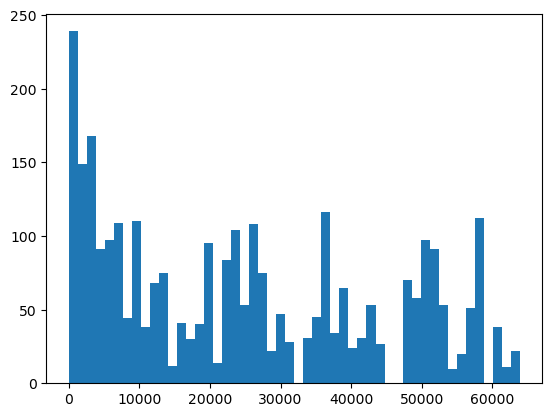

In [282]:
fig, ax = plt.subplots()
plt.hist(np.exp(X_obs_dropna['pop_D']), bins=50)
plt.show()

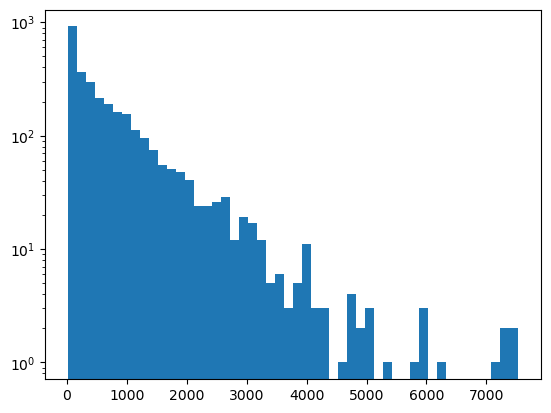

In [283]:
fig, ax = plt.subplots()
plt.hist(y_obs_dropna, bins=50)
ax.set_yscale('log')
plt.show()

In [284]:
print(len(X_predict))
X_predict_dropna = X_predict.dropna()
print(len(X_predict_dropna))
X_predict_dropna = X_predict_dropna.reset_index(drop=True)

X_predict_dropna['pop_O'] = np.log(X_predict_dropna['pop_O'])
X_predict_dropna['pop_D'] = np.log(X_predict_dropna['pop_D'])
X_predict_dropna['dist'] = np.log(X_predict_dropna['dist'])

X_predict_dropna_quantreg = X_predict_dropna.copy()
X_predict_dropna_quantreg.columns = ['const', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'dist', 'pop_O', 'pop_D']

y_predict = res.predict(X_predict_dropna)
# y_predict = res.predict(X_predict_dropna_quantreg)

761810
761810


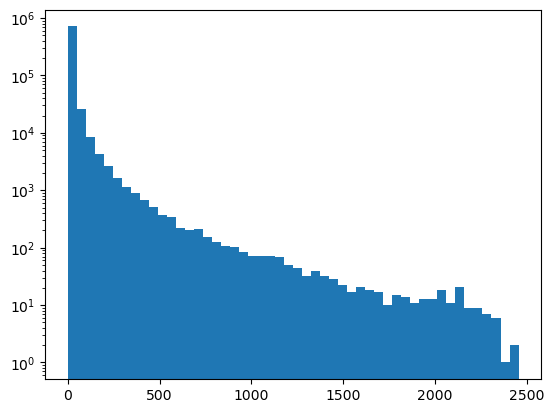

In [285]:
fig, ax = plt.subplots()
plt.hist(np.exp(y_predict), bins=50)
ax.set_yscale('log')
plt.show()

In [286]:
baseline_mov_dist

,O,D,0,1,2,3,4,5,6
0,28614.0,28615.0,-1.0,-1.0,10.2,-1.0,-1.0,-1.0,10.50
1,29043.0,28614.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00
2,29909.0,29694.0,28.6,26.4,30.0,30.0,28.0,19.2,-1.00
3,29909.0,29477.0,27.4,26.8,24.8,25.8,22.4,19.6,-1.00
4,29909.0,29476.0,120.6,116.8,116.8,111.4,118.8,86.0,26.75
...,...,...,...,...,...,...,...,...,...
108862,39397.0,35225.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00
108863,36767.0,35176.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00
108864,37427.0,26836.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00
108865,13961.0,14208.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00


In [287]:
data['y_imput'] = data['y']
j = 0
for i in range(len(data)):
    if data.loc[i, 'y_imput'] == -1:
        data.loc[i, 'y_imput'] = np.exp(y_predict[j])
        j += 1
    else:
        data.loc[i, 'y_imput'] = data.loc[i, 'y']

# data.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-imput-mov-dist-with-exo-var-sample.csv')


In [288]:
k = 0

baseline_mov_imput = baseline_mov_dist.copy()

for i in range(len(baseline_mov_imput)):
    for j in range(7):
        if baseline_mov_imput.loc[i, str(j)] == -1:
            baseline_mov_imput.loc[i, str(j)] = data.loc[k, 'y_imput']
        k += 1     

# baseline_mov_imput.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-imput-mov-dist-with-exo-var-flatten-sample.csv')



### A few tests to validate estiamted baseline

In [289]:
# X_obs_dropna_quantreg = data_quantreg.drop(['Y'], axis=1)
# y_predict_test = pd.DataFrame({'y_predict_test': res.predict(X_obs_dropna_quantreg)})

y_predict_test = pd.DataFrame({'y_predict_test': res.predict(X_obs_dropna)})

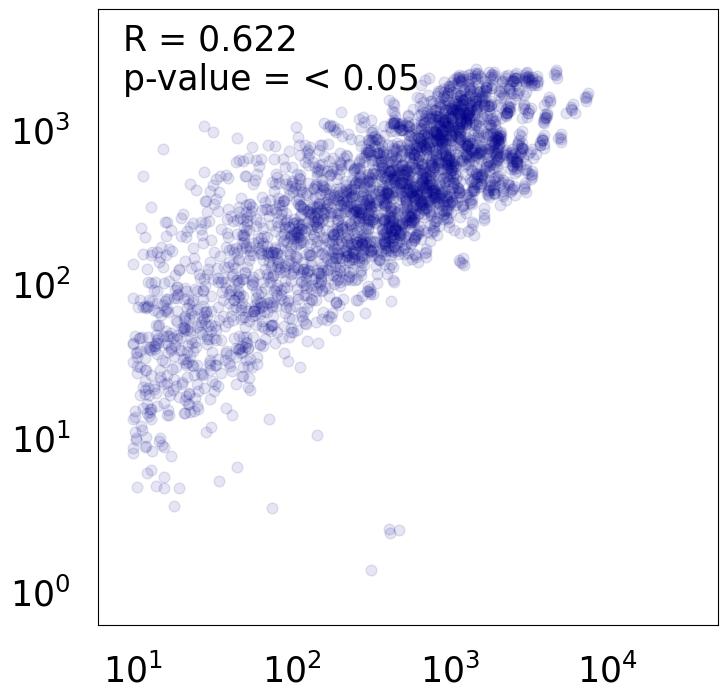

In [290]:
fig, ax = plt.subplots(figsize=(8,8))

ax.tick_params(axis = 'both', which = 'both', width = 0, length = 0, color = 'k', labelsize = 25, pad=20)

ax.scatter(y_obs_dropna, np.exp(y_predict_test['y_predict_test']), alpha=0.1, s=60, color='darkblue')

pearson = scipy.stats.pearsonr(y_obs_dropna, np.exp(y_predict_test['y_predict_test']))
R = str(round(pearson.statistic,3))
pvalue = str(round(pearson.pvalue,2))

if float(pvalue) < 0.05:
    pvalue = '< 0.05'
ax.text(0.04, 0.87, 'R = ' + R + '\np-value = ' + pvalue, transform=ax.transAxes, size=25)

ax.set_xlim([6,50000])
ax.set_ylim([0.6, 6000])
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig(wd + '/plots/mov-data-obs-pred-flow/mov-data-obs-pred-flow-' + country_short + '.png', bbox_inches = 'tight')

plt.show()



In [ ]:
count_ovalue = 0
count_uvalue = 0
value = 10
for i in range(len(y_predict)):
    if np.exp(y_predict[i]) < value:
        count_uvalue += 1
    elif np.exp(y_predict[i]) >= value:
        count_ovalue += 1


In [ ]:
count_uvalue/len(y_predict)*100

In [ ]:
len(data[data['y']>-1])/len(data)*100

In [ ]:
data[data['y']>-1]

In [ ]:
len(data)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[data['y']==-1]['pop_O'], data[data['y']==-1]['y_imput'], zorder=2, color='red', s=5, alpha=0.002)
ax.scatter(np.exp(X_obs_dropna['pop_O']), np.exp(y_predict_test), zorder=5, color='gold', s=5, alpha=0.4)
ax.scatter(np.exp(X_obs_dropna['pop_O']), y_obs_dropna, zorder= 4, color='blue', s=5, alpha=0.3)

# ax.set_xlim([-50000, 300000])
# ax.set_ylim([-100, 200])

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()


In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_obs['pop_O'], X_obs['pop_D'], color='blue', s=5, alpha=0.3)
ax.scatter(data[data['y']==-1]['pop_O'], data[data['y']==-1]['pop_D'], color='red', s=5, alpha=0.3)

plt.show()



In [ ]:
fig, ax = plt.subplots()
ax.hist(data[data['y']>-1]['y_imput'], bins=120, density=True, color='blue', alpha=0.5, zorder=3)
ax.hist(data[data['y']==-1]['y_imput'], bins=120, density=True, color='red', alpha=0.6, zorder=2)
ax.set_yscale('log')




In [ ]:
fig, ax = plt.subplots()
# ax.hist(data[data['y']>-1]['y_imput'], bins=120, density=True, color='blue', alpha=0.5, zorder=3)
ax.hist(np.exp(y_predict_test), bins=120, density=True, color='red', alpha=0.6, zorder=2)
ax.set_yscale('log')
# ax.set_xscale('log')

plt.show()